Titanic Survival Prediction Model

By Elma Fortunate Phiri


About Dataset: 


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Abstract:  To perform data cleaning and exploratory data analysis (EDA) on the dataset. 
           Explore the relationships between variables and identify patterns and trends in the data


Aim:       To build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


 Data collection and Preprocessing

Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling as pp
%matplotlib inline


In [2]:
from sklearn. preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

In [3]:
titanic = pd.read_csv("C:\\Users\\elmaf\\Desktop\\ProgidyInfoTech\\Titanic dataset\\titanic3.csv")
titanic

pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000    0.0    0.0   24160  211.3375       B5        S    2   
1       male   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11   
2     female   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1305  female      NaN    1.0    0.0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000    0.0    0.0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000    0.0    0.0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000    0.0    0.0  315082    7.8750      NaN        S  NaN   
1309     NaN      NaN    NaN    NaN     NaN       NaN      NaN      NaN  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  
1309    NaN                              NaN  

[1310 rows x 14 columns]

Data Exploration


In [4]:
titanic.head()

pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [5]:
titanic.shape

(1310, 14)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [7]:
titanic.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

In [8]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [9]:
titanic.index

RangeIndex(start=0, stop=1310, step=1)

In [10]:
pp.ProfileReport(titanic)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The Profile report highlighted the following:
1. We have 14 variables in our dataset
2. We have 1310 observations
3. Age  has 20.2% missing values
5. Cabin has 687 (77.5%) missing values
6. Boat has 62.9% missing values
7. Body has 90.8% missing values
9. home.dest has 565 (43.1%) missing values

In [11]:
titanic.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Age has  wrong data dtype. It should be int but its float

In [12]:
titanic["sex"].value_counts()

male      843
female    466
Name: sex, dtype: int64

Data Preprocessing

In [13]:
#Checking for null values
titanic.isnull().sum().sort_values(ascending=False)

body         1189
cabin        1015
boat          824
home.dest     565
age           264
embarked        3
fare            2
pclass          1
survived        1
name            1
sex             1
sibsp           1
parch           1
ticket          1
dtype: int64

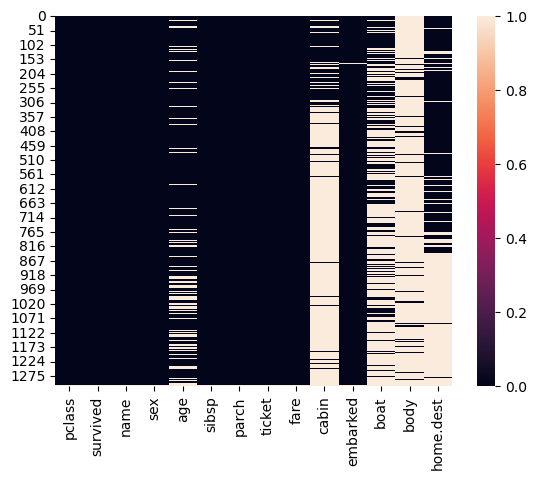

In [14]:
#Visualizing missing values
sns.heatmap(titanic.isnull())
plt.show()

In [15]:
#droping columns with more than 40% missing values 
titanic = titanic.drop(["cabin", 'body','boat','home.dest'], axis=1)
titanic.head()


pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare embarked  
0  29.0000    0.0    0.0   24160  211.3375        S  
1   0.9167    1.0    2.0  113781  151.5500        S  
2   2.0000    1.0    2.0  113781  151.5500        S  
3  30.0000    1.0    2.0  113781  151.5500        S  
4  25.0000    1.0    2.0  113781  151.5500        S

In [16]:
#Renaming columns
titanic.rename(columns={
    " pclass": "Pclass",
    "survived": "Survived",
    "name": "Name",
    "sex": "Sex",
    "age": "Age",
    "sibsp": "No of Sibilings/ Spouse aboard",
    "parch": "No of Parents/Children",
    "ticket": "Ticket Number",
    "fare": "Fare",
    "embarked": "Embarked"
}, inplace=True)
titanic.head()

pclass  Survived                                             Name     Sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       Age  No of Sibilings/ Spouse aboard  No of Parents/Children  \
0  29.0000                             0.0                     0.0   
1   0.9167                             1.0                     2.0   
2   2.0000                             1.0                     2.0   
3  30.0000                             1.0                     2.0   
4  25.0000                             1.0                     2.0   

  Ticket Number      Fare Embarked  
0         24160  211.3375        S  
1        113781  151.5500        S  
2        113781  151.5500        S  
3        113781  151.5500        S  
4        113781  151.5500        S

In [17]:
titanic["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [18]:
#Replace values in embarked column
titanic["Embarked"] = titanic["Embarked"].replace({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
titanic.sample(10)

pclass  Survived                             Name     Sex   Age  \
214      1.0       1.0           Newell, Miss. Marjorie  female  23.0   
615      3.0       0.0      Alhomaki, Mr. Ilmari Rudolf    male  20.0   
335      2.0       0.0       Bateman, Rev. Robert James    male  51.0   
22       1.0       1.0            Behr, Mr. Karl Howell    male  26.0   
401      2.0       1.0     Duran y More, Miss. Asuncion  female  27.0   
1270     3.0       0.0   Vande Walle, Mr. Nestor Cyriel    male  28.0   
768      3.0       0.0               Denkoff, Mr. Mitto    male   NaN   
666      3.0       0.0  Barbara, Mrs. (Catherine David)  female  45.0   
20       1.0       1.0    Beckwith, Mr. Richard Leonard    male  37.0   
1004     3.0       1.0   McDermott, Miss. Brigdet Delia  female   NaN   

      No of Sibilings/ Spouse aboard  No of Parents/Children  \
214                              1.0                     0.0   
615                              0.0                     0.0   
335                              0.0                     0.0   
22                               0.0                     0.0   
401                              1.0                     0.0   
1270                             0.0                     0.0   
768                              0.0                     0.0   
666                              0.0                     1.0   
20                               1.0                     1.0   
1004                             0.0                     0.0   

         Ticket Number      Fare     Embarked  
214              35273  113.2750    Cherbourg  
615   SOTON/O2 3101287    7.9250  Southampton  
335        S.O.P. 1166   12.5250  Southampton  
22              111369   30.0000    Cherbourg  
401      SC/PARIS 2149   13.8583    Cherbourg  
1270            345770    9.5000  Southampton  
768             349225    7.8958  Southampton  
666               2691   14.4542    Cherbourg  
20               11751   52.5542  Southampton  
1004            330932    7.7875   Queenstown

In [19]:
#Checking for null values
titanic.isnull().sum().sort_values(ascending=False)

Age                               264
Embarked                            3
Fare                                2
pclass                              1
Survived                            1
Name                                1
Sex                                 1
No of Sibilings/ Spouse aboard      1
No of Parents/Children              1
Ticket Number                       1
dtype: int64

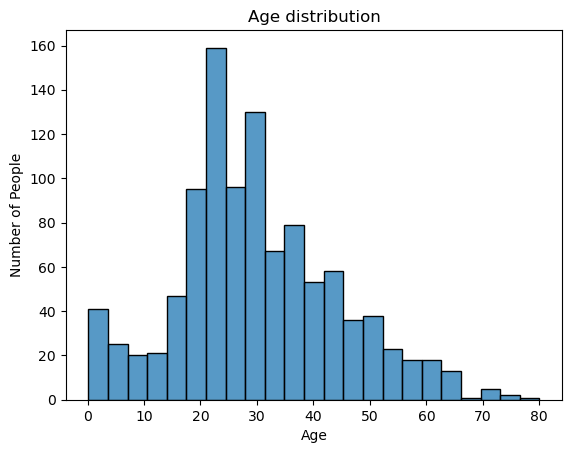

In [20]:
#Histogram for Age column
sns.histplot(x = "Age", data = titanic)
plt.title("Age distribution")
plt.ylabel("Number of People")
plt.show()

In [21]:
#Handling Missing data in Age column  by filling na values
Age_mean = titanic["Age"].mean()
Age_mean
titanic['Age']=titanic['Age'].fillna(Age_mean)

In [22]:
#Handling Missing values in Embarked column by filling na values
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].value_counts().idxmax())

In [23]:
#Handling Missing values by filling na values
titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].mean())

In [24]:
#Checking for null values
titanic.isnull().sum().sort_values(ascending=False)

pclass                            1
Survived                          1
Name                              1
Sex                               1
No of Sibilings/ Spouse aboard    1
No of Parents/Children            1
Ticket Number                     1
Age                               0
Fare                              0
Embarked                          0
dtype: int64

In [25]:
#drop na values
titanic.dropna(inplace= True)

In [26]:
#Checking for null values
titanic.isnull().sum().sort_values(ascending=False)

pclass                            0
Survived                          0
Name                              0
Sex                               0
Age                               0
No of Sibilings/ Spouse aboard    0
No of Parents/Children            0
Ticket Number                     0
Fare                              0
Embarked                          0
dtype: int64

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pclass                          1309 non-null   float64
 1   Survived                        1309 non-null   float64
 2   Name                            1309 non-null   object 
 3   Sex                             1309 non-null   object 
 4   Age                             1309 non-null   float64
 5   No of Sibilings/ Spouse aboard  1309 non-null   float64
 6   No of Parents/Children          1309 non-null   float64
 7   Ticket Number                   1309 non-null   object 
 8   Fare                            1309 non-null   float64
 9   Embarked                        1309 non-null   object 
dtypes: float64(6), object(4)
memory usage: 112.5+ KB


In [28]:
 #changing datatypes
titanic=titanic.astype({
    "Age":"int64",
    "pclass": "int64",
    "Survived": "int64"
   }
)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pclass                          1309 non-null   int64  
 1   Survived                        1309 non-null   int64  
 2   Name                            1309 non-null   object 
 3   Sex                             1309 non-null   object 
 4   Age                             1309 non-null   int64  
 5   No of Sibilings/ Spouse aboard  1309 non-null   float64
 6   No of Parents/Children          1309 non-null   float64
 7   Ticket Number                   1309 non-null   object 
 8   Fare                            1309 non-null   float64
 9   Embarked                        1309 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 112.5+ KB


In [29]:
titanic["No of Parents/Children"] = titanic["No of Parents/Children"].astype("int64")
titanic['No of Sibilings/ Spouse aboard'] = titanic['No of Sibilings/ Spouse aboard'].astype("int64")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pclass                          1309 non-null   int64  
 1   Survived                        1309 non-null   int64  
 2   Name                            1309 non-null   object 
 3   Sex                             1309 non-null   object 
 4   Age                             1309 non-null   int64  
 5   No of Sibilings/ Spouse aboard  1309 non-null   int64  
 6   No of Parents/Children          1309 non-null   int64  
 7   Ticket Number                   1309 non-null   object 
 8   Fare                            1309 non-null   float64
 9   Embarked                        1309 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 112.5+ KB


In [30]:
titanic.head()

pclass  Survived                                             Name     Sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

   Age  No of Sibilings/ Spouse aboard  No of Parents/Children Ticket Number  \
0   29                               0                       0         24160   
1    0                               1                       2        113781   
2    2                               1                       2        113781   
3   30                               1                       2        113781   
4   25                               1                       2        113781   

       Fare     Embarked  
0  211.3375  Southampton  
1  151.5500  Southampton  
2  151.5500  Southampton  
3  151.5500  Southampton  
4  151.5500  Southampton

In [31]:
#Correlation matrix
corr_matrix = titanic.corr()
corr_matrix

C:\Users\elmaf\AppData\Local\Temp\ipykernel_17832\2987745338.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic.corr()


pclass  Survived       Age  \
pclass                          1.000000 -0.312469 -0.372115   
Survived                       -0.312469  1.000000 -0.047021   
Age                            -0.372115 -0.047021  1.000000   
No of Sibilings/ Spouse aboard  0.060832 -0.027825 -0.190345   
No of Parents/Children          0.018322  0.082660 -0.128821   
Fare                           -0.558477  0.244208  0.175114   

                                No of Sibilings/ Spouse aboard  \
pclass                                                0.060832   
Survived                                             -0.027825   
Age                                                  -0.190345   
No of Sibilings/ Spouse aboard                        1.000000   
No of Parents/Children                                0.373587   
Fare                                                  0.160224   

                                No of Parents/Children      Fare  
pclass                                        0.018322 -0.558477  
Survived                                      0.082660  0.244208  
Age                                          -0.128821  0.175114  
No of Sibilings/ Spouse aboard                0.373587  0.160224  
No of Parents/Children                        1.000000  0.221522  
Fare                                          0.221522  1.000000

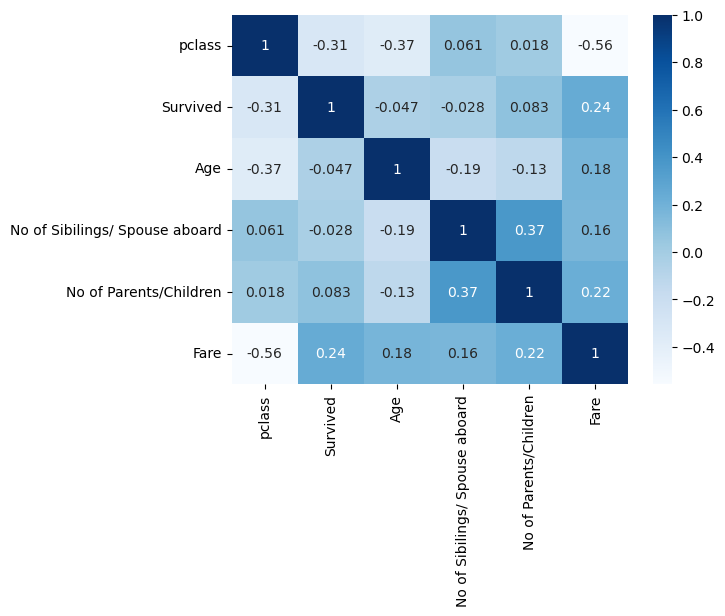

In [32]:
#Visualising our correlation matrix
sns.heatmap(corr_matrix, annot= True, cmap= 'Blues')
plt.show()

In [33]:
#Survival frequency according to gender
pd.crosstab(titanic.Survived , titanic.Sex)


Sex       female  male
Survived              
0            127   682
1            339   161

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

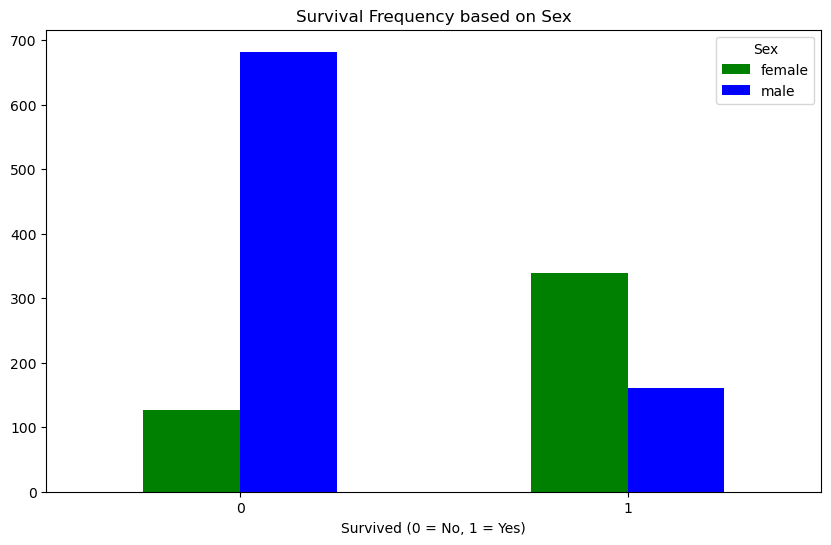

In [34]:
pd.crosstab(titanic.Survived , titanic.Sex).plot(kind = 'bar', figsize=(10,6), color = ['green','blue'])
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.title("Survival Frequency based on Sex")
plt.xticks(rotation=0)



In [35]:
#Survived frequency according to age
survival_age = pd.crosstab(titanic.Survived , titanic.Age)
survival_age

Age       0   1   2   3   4   5   6   7   8   9   ...  63  64  65  66  67  70  \
Survived                                          ...                           
0          2   3   8   2   3   1   3   2   2   6  ...   2   3   3   1   1   3   
1         10   7   4   5   7   4   3   2   4   4  ...   2   2   0   0   0   0   

Age       71  74  76  80  
Survived                  
0          2   1   0   0  
1          0   0   1   1  

[2 rows x 73 columns]

In [36]:
#Survival frequency based on class
pd.crosstab(titanic.Survived, titanic.pclass)

pclass      1    2    3
Survived               
0         123  158  528
1         200  119  181

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

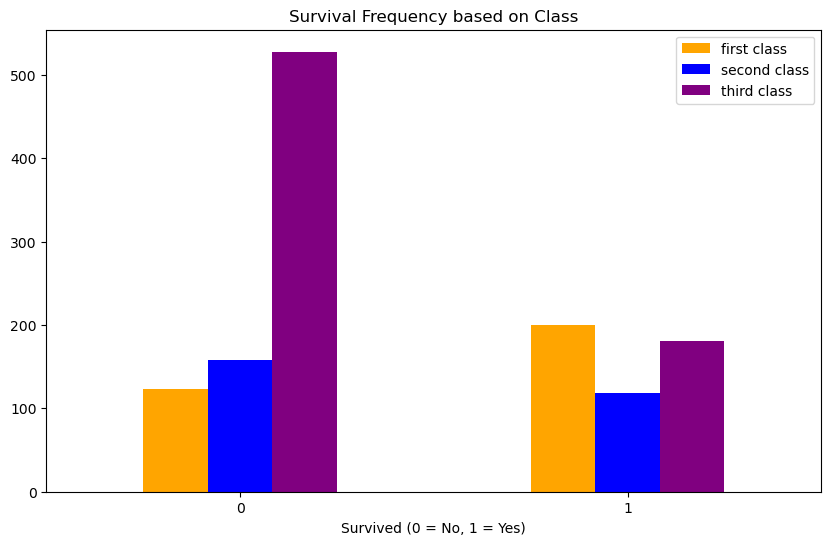

In [37]:
#Visualizing survival frequency based on  class
crosstab = pd.crosstab(titanic.Survived, titanic.pclass)
crosstab.plot(kind='bar', figsize=(10,6), color=['orange', 'blue', 'purple'])
plt.legend(["first class", "second class", "third class"])
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.title("Survival Frequency based on Class")
plt.xticks(rotation=0)

In [38]:
#Survival frequency based on embarking station
pd.crosstab(titanic.Survived, titanic.Embarked)

Embarked  Cherbourg  Queenstown  Southampton
Survived                                    
0               120          79          610
1               150          44          306

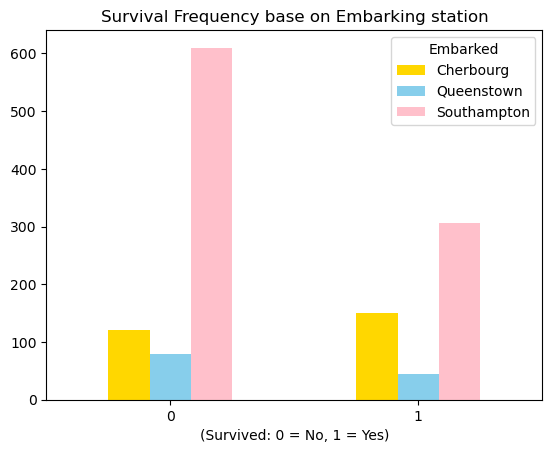

In [39]:
#Visualising the #Survival frequency based on embarking station
pd.crosstab(titanic.Survived, titanic.Embarked).plot(kind = "bar", color= ["gold", "skyblue", "pink"])
plt.title("Survival Frequency base on Embarking station")
plt.xlabel("(Survived: 0 = No, 1 = Yes)")
plt.xticks(rotation = 0)
plt.show()

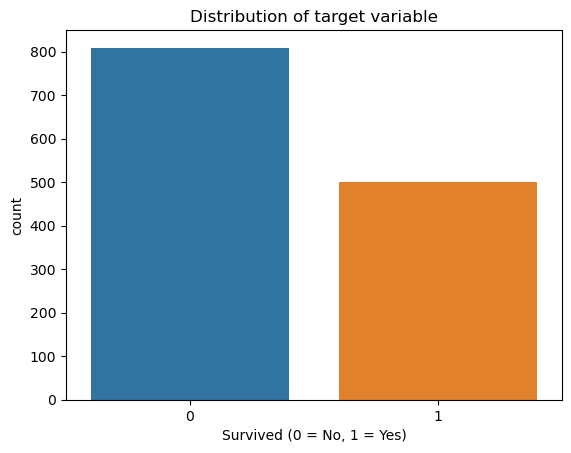

In [40]:
#Visualising the target variable
sns.countplot(x = "Survived", data = titanic)
plt.title("Distribution of target variable")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.xticks(rotation = 0)
plt.show()

In [41]:
#Visualising categorical values
titanic.select_dtypes('object')

Name     Sex Ticket Number  \
0                       Allen, Miss. Elisabeth Walton  female         24160   
1                      Allison, Master. Hudson Trevor    male        113781   
2                        Allison, Miss. Helen Loraine  female        113781   
3                Allison, Mr. Hudson Joshua Creighton    male        113781   
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female        113781   
...                                               ...     ...           ...   
1304                             Zabour, Miss. Hileni  female          2665   
1305                            Zabour, Miss. Thamine  female          2665   
1306                        Zakarian, Mr. Mapriededer    male          2656   
1307                              Zakarian, Mr. Ortin    male          2670   
1308                               Zimmerman, Mr. Leo    male        315082   

         Embarked  
0     Southampton  
1     Southampton  
2     Southampton  
3     Southampton  
4     Southampton  
...           ...  
1304    Cherbourg  
1305    Cherbourg  
1306    Cherbourg  
1307    Cherbourg  
1308  Southampton  

[1309 rows x 4 columns]

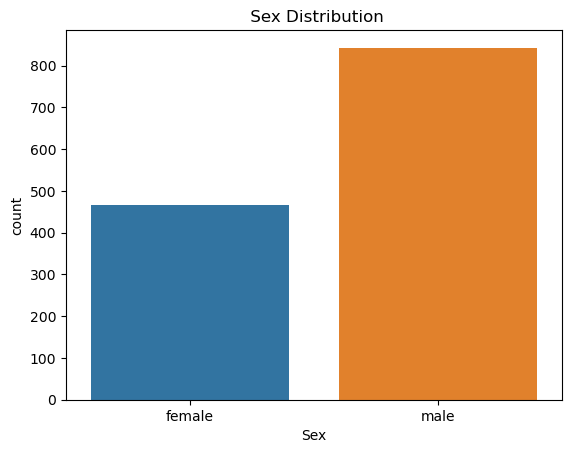

In [42]:
#Visualising Categorical Variables
sns.countplot(x = 'Sex', data = titanic)
plt.title(" Sex Distribution")
plt.show()

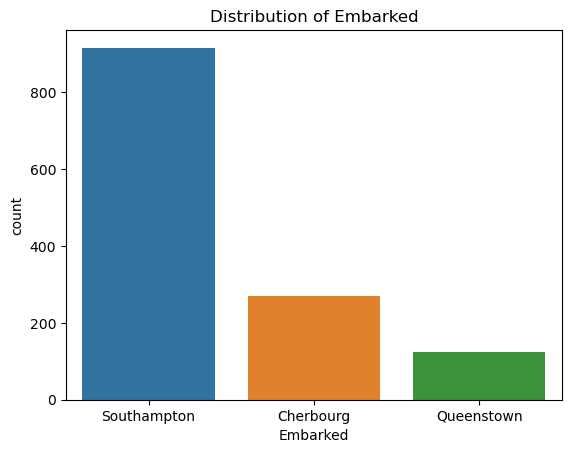

In [43]:
sns.countplot(x = "Embarked", data = titanic)
plt.title("Distribution of Embarked")
plt.show()

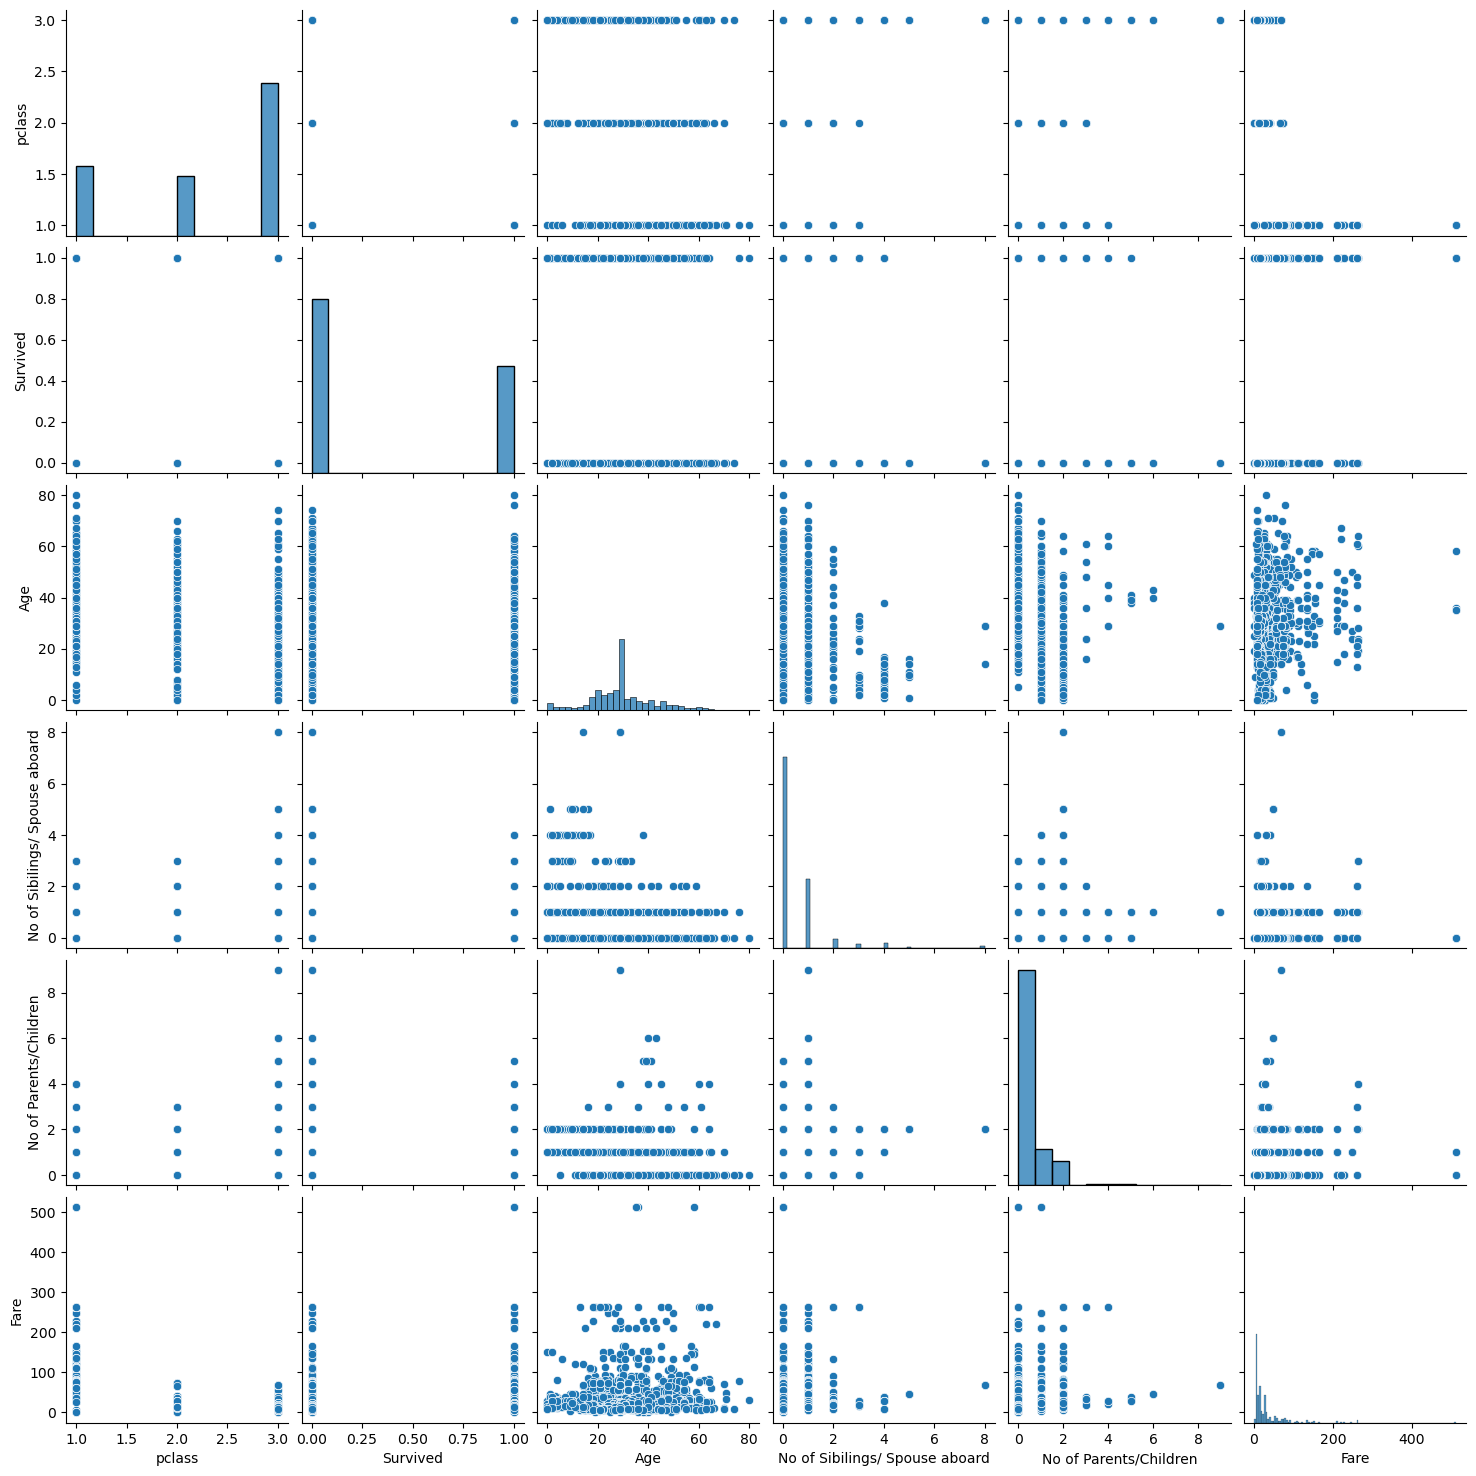

In [44]:
sns.pairplot(data = titanic)
plt.show()

In [45]:
#Exploring Numerical Values
titanic.select_dtypes('int')

pclass  Survived  Age  No of Sibilings/ Spouse aboard  \
0          1         1   29                               0   
1          1         1    0                               1   
2          1         0    2                               1   
3          1         0   30                               1   
4          1         0   25                               1   
...      ...       ...  ...                             ...   
1304       3         0   14                               1   
1305       3         0   29                               1   
1306       3         0   26                               0   
1307       3         0   27                               0   
1308       3         0   29                               0   

      No of Parents/Children  
0                          0  
1                          2  
2                          2  
3                          2  
4                          2  
...                      ...  
1304                       0  
1305                       0  
1306                       0  
1307                       0  
1308                       0  

[1309 rows x 5 columns]

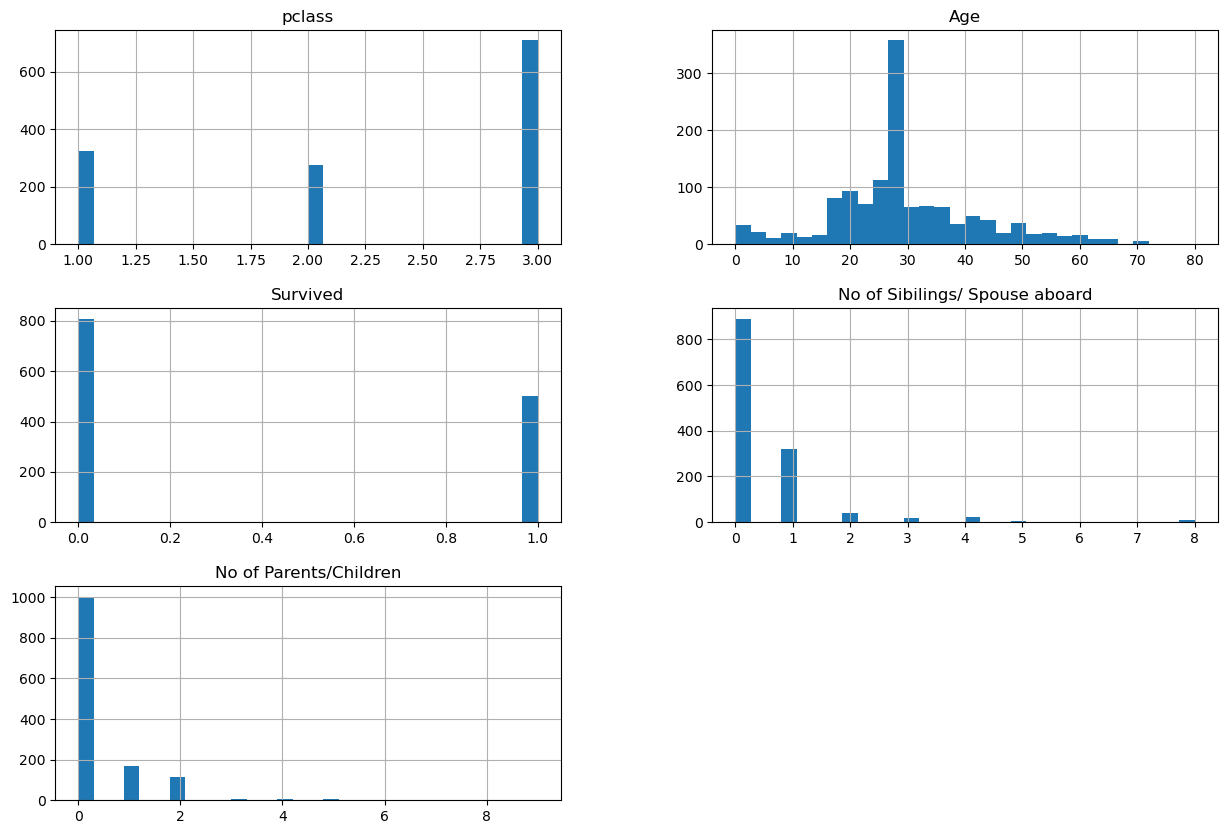

In [46]:
#VIsualising numerical features
numerical_features = ["pclass","Age","Survived","No of Sibilings/ Spouse aboard", "No of Parents/Children"]
titanic[numerical_features].hist(bins = 30, figsize= (15,10))
plt.show()

Model Preprocessing

In [47]:
#Encoding categorical values
cat_values =["Name", "Sex","Ticket Number","Embarked"]
titanic= pd.get_dummies(titanic, columns = cat_values, drop_first=True)


In [48]:
#Label encoding the target variable
le = LabelEncoder()
titanic['Survived']= le.fit_transform( titanic['Survived'])


In [49]:
#Feature Scaling
scaler = StandardScaler()
titanic[numerical_features] = scaler.fit_transform(titanic[numerical_features])

Model Building

In [50]:
y = titanic["Survived"].info()
titanic["Survived"]=titanic["Survived"].astype("int64")
#y.astype(int)
#y_train.astype(int)
#y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1309 entries, 0 to 1308
Series name: Survived
Non-Null Count  Dtype  
--------------  -----  
1309 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


In [51]:
#train_test split
X = titanic.drop("Survived", axis = 1)
y = titanic["Survived"]
X_standardised = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_standardised,y, test_size= 0.2, random_state=42)


In [52]:
#Model Training using LogisticRegression
Lg = LogisticRegression()
Lg.fit(X_train,y_train)

LogisticRegression()

In [53]:
#Model Training using RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

HyperParameter Tuning

In [54]:
#Hyperparameter tuning using gridsearchcv for RandomForest
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini']
}
grid_search = GridSearchCV(estimator= rfc, param_grid= param_grid,cv = 3, n_jobs= -1, verbose= 2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator
best_rfc = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\elmaf\anaconda3\Lib\site-packages\

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}


In [55]:
#MOdel Predictions
y_pred = best_rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [56]:
#Calculating accuracy
Accuracy = accuracy_score(y_pred,y_test)
Accuracy

0.8015267175572519

In [57]:
#Hyperparameter tuning using gridsearchcv for Logistic Regression
# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10],
               'solver': ['liblinear', 'saga']}
grid = GridSearchCV(estimator = Lg, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [58]:
#MOdel Predictions
y_pred = best_rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [59]:
#Calculating accuracy
Accuracy = accuracy_score(y_pred,y_test)
Accuracy

0.8015267175572519

In [60]:
#Hyperparameter tuning using Randomizedsearchcv for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini']
}
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, cv=5, n_iter=20, verbose=True)
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\elmaf\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300]},
                   verbose=True)

In [61]:
#Model Evaluation using RandomisedSearchCV - RandomForestClassifier
y_pred_rs_rf = rs_rf .predict(X_test)
y_pred_rs_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [62]:
#Model Accuracy
Accuracy_rnd = accuracy_score(y_pred_rs_rf,y_test)
Accuracy_rnd

0.7977099236641222

In [63]:
#Hyperparameter tuning using Randomizedsearchcv for Logistic Regression
# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10],
               'solver': ['liblinear', 'saga']}
# Initialize RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=param_grid, 
                                cv=3, n_iter=20, verbose=True, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the data
rs_log_reg.fit(X_train, y_train)

c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, verbose=True)

Model Evaluation

In [64]:
#Model Evaluation using RandomisedSearchCV - Logistic Regression
y_pred_rcv = rs_log_reg.predict(X_test)
y_pred_rcv

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [65]:
#Model Accuracy
Accuracy_rnd_reg= accuracy_score(y_pred_rcv ,y_test)
Accuracy_rnd_reg

0.7748091603053435

From the 2 models used Logistic Regression and RandomForest Classifier, the best performing model is RandomForestClassifier model hypertuned using  RandomisedSearchCV

The model is 79% accurate

[[137   7]
 [ 46  72]]
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       144
           1       0.91      0.61      0.73       118

    accuracy                           0.80       262
   macro avg       0.83      0.78      0.78       262
weighted avg       0.82      0.80      0.79       262



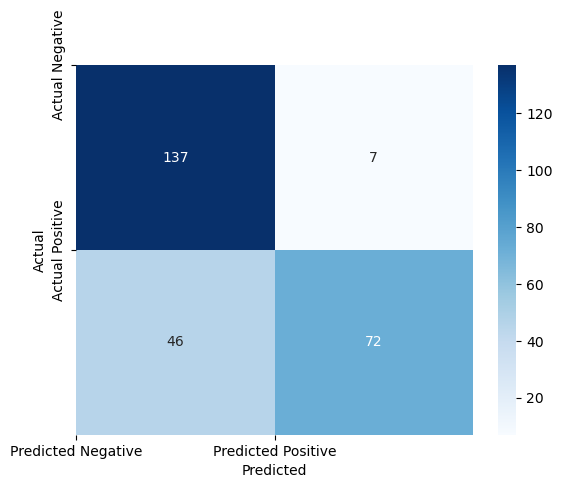

In [66]:
# Evaluation metrics
print(confusion_matrix(y_test, y_pred_rs_rf))
print(classification_report(y_test, y_pred_rs_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rs_rf), annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.show()

Explanation:
True Positives (TP): Correctly predicted positive cases.

 True Negatives (TN): Correctly predicted negative cases. 

False Positives (FP): Incorrectly predicted positive cases. False Negatives (FN):
Incorrectly predicted negative cases.

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) curve')

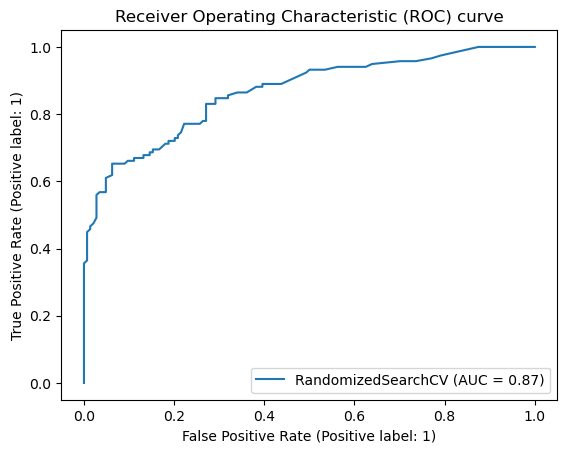

In [67]:
#ROC display curve
RocCurveDisplay.from_estimator(estimator= rs_rf,X = X_test, y =y_test);
plt.title("Receiver Operating Characteristic (ROC) curve")

This is great, our model does far better with an AUC of 0.86, but a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

Text(0, 0.5, 'Importance Score')

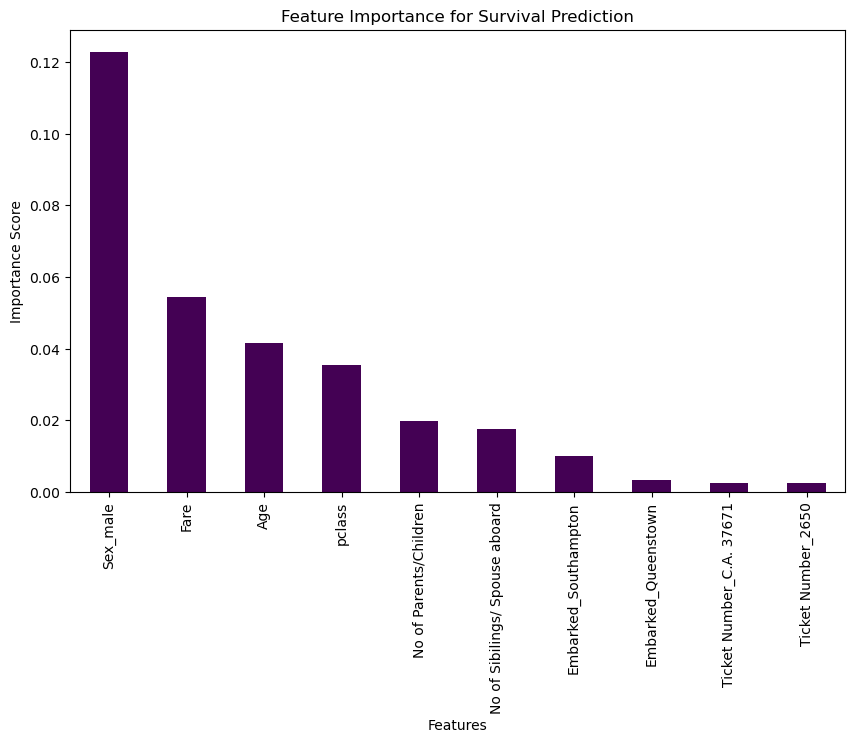

In [68]:
#Feature Importance
best_rf = rs_rf.best_estimator_  # Retrieve the best estimator from RandomizedSearchCV
features = X.columns 

# Get feature importances from the best RandomForestClassifier model
feature_importances = best_rf.feature_importances_
feature_importances = pd.Series(feature_importances, index=features)
feature_importances = feature_importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', cmap='viridis')
plt.title('Feature Importance for Survival Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')




The bar plot shows the importance of each feature in making predictions. Higher importance
indicates a greater influence on the model’s predictions.

Conclusion

Our model is 79% accurate. It is fairly reasonably but there is room for improvement

Key Findings




Gender is the most significant predictor of survival followed by class and age

Female passangers had a higher chance of surviving compared to male passangers